# Problem Sheet 10 - Deep Learning

The goal of this exercise is to get familiar with the principle of backpropagation for the training of neural networks. Remember the principle architecture of a neural network. The transition from layer $l$ to layer $l+1$ is realized as follows

$$
a^{(l+1)} = \sigma\left( W^{(l)} a^{(l-1)} + b^{(l)} \right).
$$

We have $a^{(l)}, b^{(l)} \in \mathbb{R}^{n_l}$, and $W^{(l)} \in \mathbb{R}^{n_l,n_{l+1}}$. The activation function $\sigma \colon \mathbb R \to \mathbb R, \sigma(x) = \frac{1}{1+e^{-x}}$ is applied elementwise.

**Task:** Complete the following function with the sigmoid activation.

In [2]:
import numpy as np

def my_activation(x):
    """
    Sigmoid activation function.

    Arguments:
    x -- Input value or numpy array.

    Returns:
    s -- Output value or numpy array after applying the sigmoid activation.
    """

    s = 1 / (1 + np.exp(-x))
    
    return s


Now, we want to implement backpropagation for a network with a fixed number of layers ($=3$) and 2d input.

**Task:** Complete the following code that implements backpropagation for a network of fixed size 3. Use ''my_activation'' as activation function. You can use the MATLAB code from our OPAL folder as a help.

Layer sizes:
$$
n_1 = 2, n_2 = 2, n_3 = 3, n_4 = 2
$$

In [3]:
import numpy as np

def sigmoid(x):
    """
    Sigmoid activation function.

    Arguments:
    x -- Input value or numpy array.

    Returns:
    s -- Output value or numpy array after applying the sigmoid activation.
    """

    s = 1 / (1 + np.exp(-x))
    
    return s

def my_backprop(x1, x2, y, eta):
    """
    Backpropagation algorithm for training a neural network.

    Arguments:
    x1 -- Input value for the first node.
    x2 -- Input value for the second node.
    y -- Target output value.
    eta -- Learning rate.

    Returns:
    W -- List of weight matrices for each layer.
    b -- List of bias vectors for each layer.
    """
    
    # Params (SG_iterations: number of iterations of Stochastic Gradient Descent, n layer sizes)
    SG_iterations = 1000000
    n = [2, 3, 2]
    
    W = []
    b = []
    
    for i in range(3):
        # Initialize weights and biases
        W.append(np.random.randn(n[i + 1], n[i]))
        b.append(np.random.randn(n[i + 1], 1))
        
    for i in range(SG_iterations):
        # Stochastic Gradient Descent (SGD) step
        # Forward propagation
        z1 = np.dot(W[0], np.array([[x1], [x2]])) + b[0]
        a1 = sigmoid(z1)
        z2 = np.dot(W[1], a1) + b[1]
        a2 = sigmoid(z2)
        z3 = np.dot(W[2], a2) + b[2]
        a3 = sigmoid(z3)
        
        # Backward propagation
        delta3 = a3 - np.array([[y], [1 - y]])
        delta2 = np.dot(W[2].T, delta3) * a2 * (1 - a2)
        delta1 = np.dot(W[1].T, delta2) * a1 * (1 - a1)
        
        # Update weights and biases
        W[2] -= eta * np.dot(delta3, a2.T)
        b[2] -= eta * delta3
        W[1] -= eta * np.dot(delta2, a1.T)
        b[1] -= eta * delta2
        W[0] -= eta * np.dot(delta1, np.array([[x1, x2]]))
        b[0] -= eta * delta1
        
    return W, b


**Task:** The following code represents our training data. Visualize the data accordingly.

**Hint:** We have a classification task with 2 classes. The result is a one-hot encoded vector of length 2, i.e., if there is a one in the first entry, the point belongs to the first class and if there is a one in the second entry, it belongs to the second class.

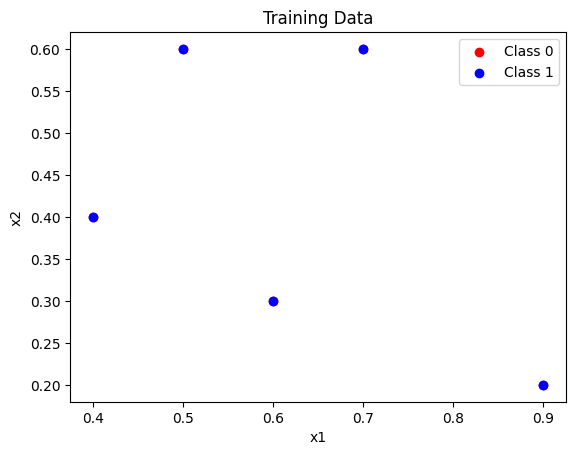

In [7]:
import matplotlib.pyplot as plt

x1 = np.array([0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7])
x2 = np.array([0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6])
y = np.array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

# Separate the data points based on their classes
x1_class0 = x1[y[0] == 0]
x2_class0 = x2[y[0] == 0]
x1_class1 = x1[y[1] == 1]
x2_class1 = x2[y[1] == 1]

# Plot the data points
plt.scatter(x1_class0, x2_class0, color='red', label='Class 0')
plt.scatter(x1_class1, x2_class1, color='blue', label='Class 1')

# Set the labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


**Task:** Train the network using ''my_backprop'' and look at the results. Find different measures on how well the classification works.